In [1]:
# on cherche à comprendre les outliers que l'on peut observer sur le fichier des valeurs foncières

In [2]:
# requirements
import pandas as pd
import seaborn as sns

In [3]:
# prenons un cas simple sur Villeurbanne sur 2020
df = pd.read_csv('datas/valeursfoncieres/valeursfoncieres-2016-2020_69.csv')

<AxesSubplot:xlabel='annee', ylabel='pm2'>

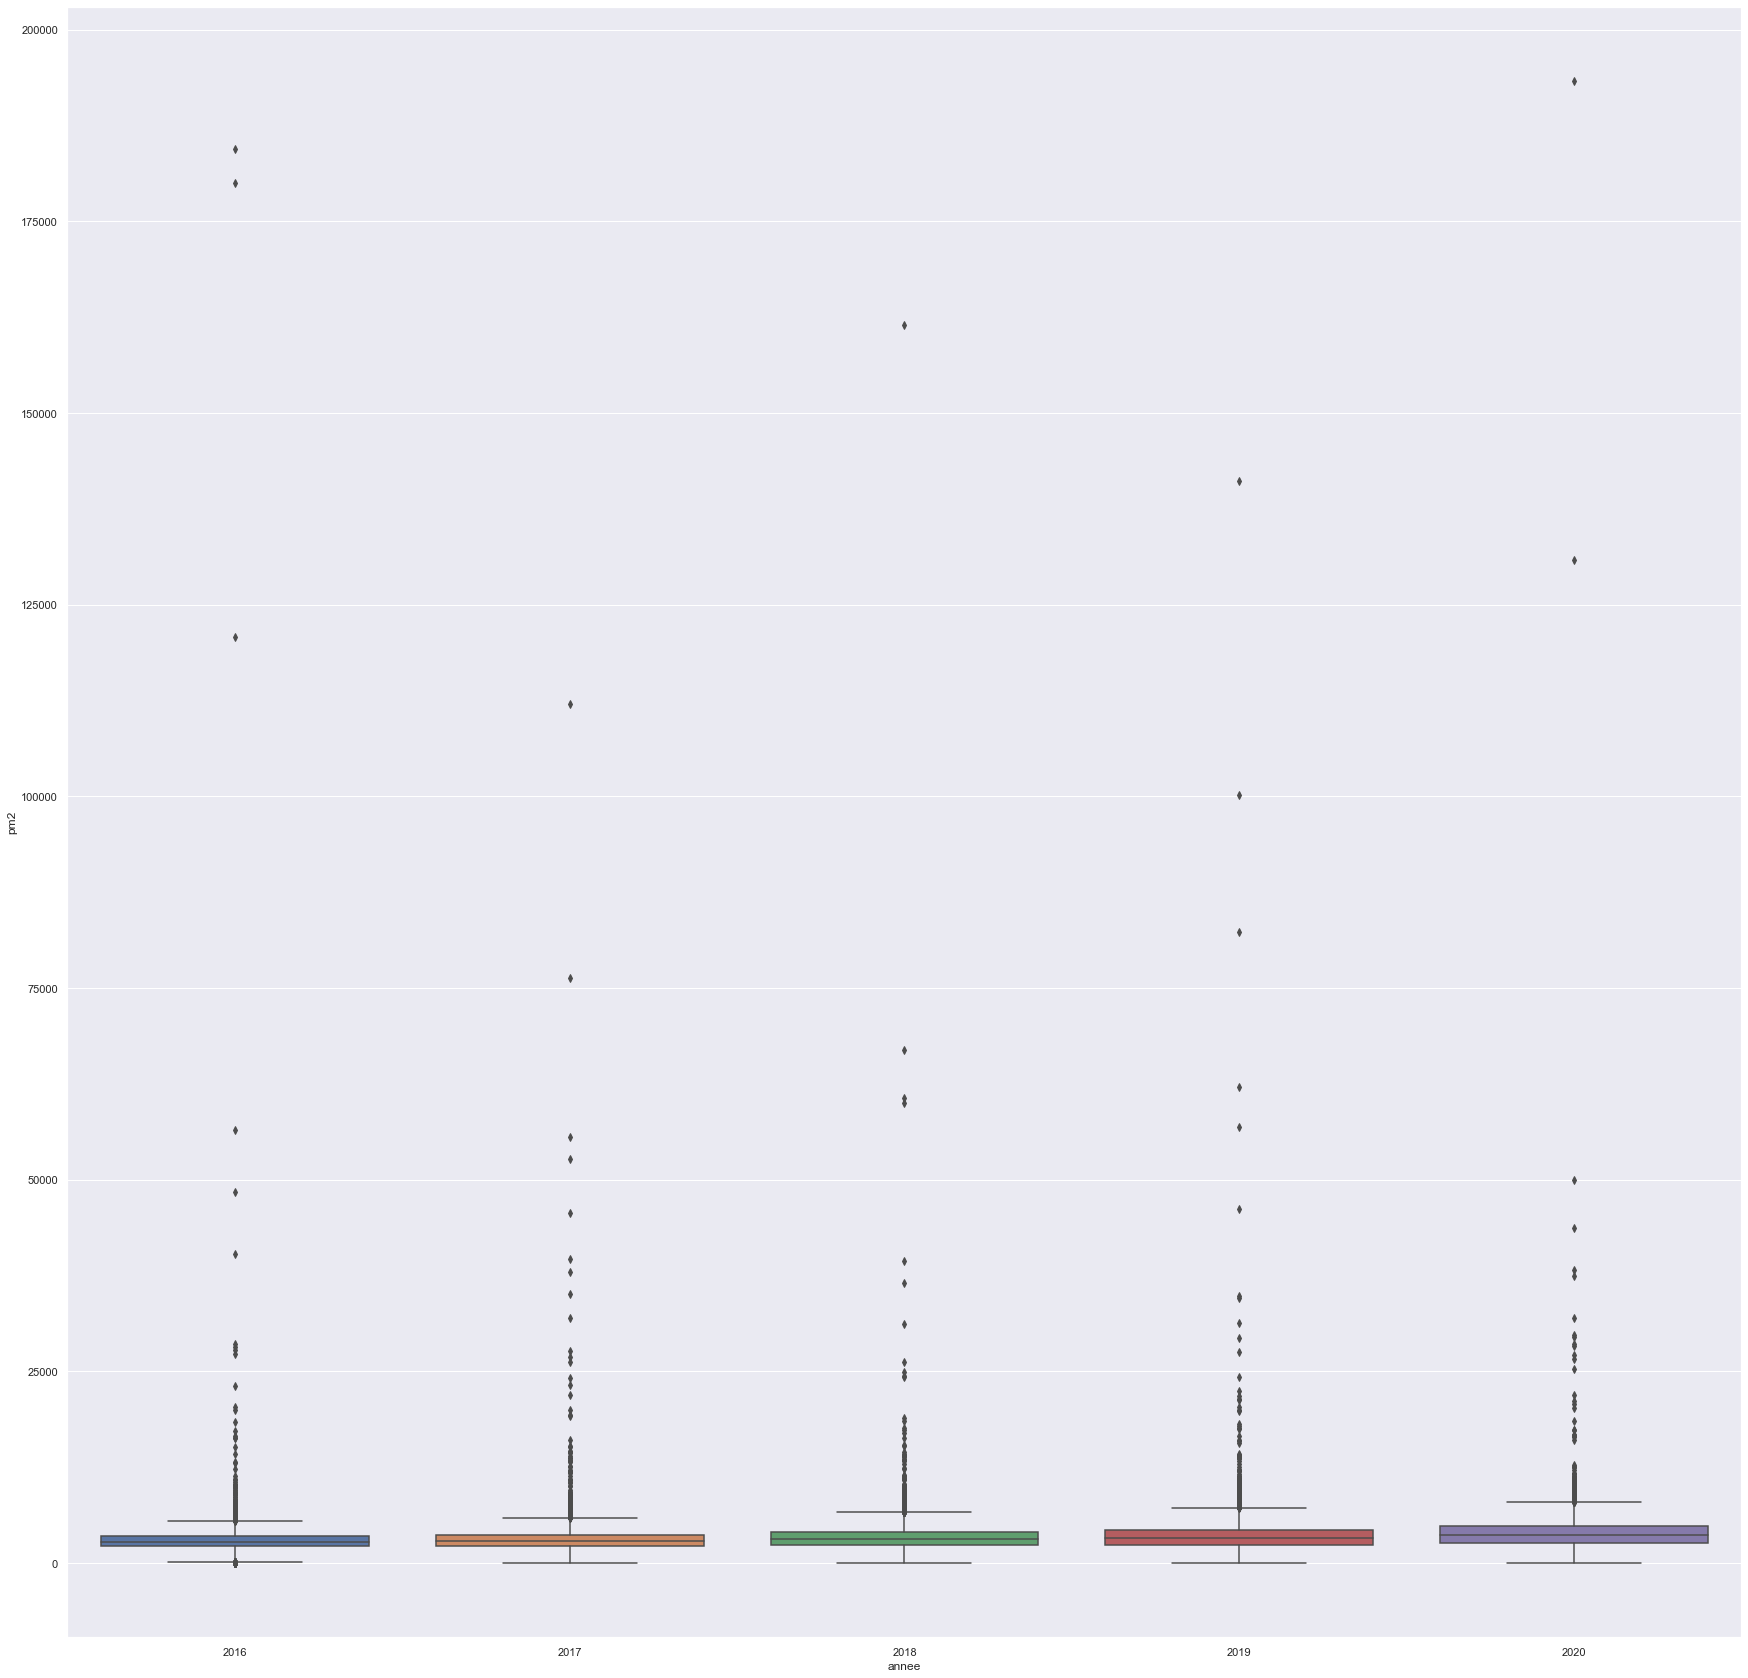

In [37]:
sns.set(rc={'figure.figsize':(30,30)})
sns.boxplot(x="annee", y="pm2", data=df)

In [15]:
# identifier les valeurs aberrantes : 
# je chercher les valeurs aberrantes pour 2020
print(df[(df.annee==2018)&(df.Commune=='VILLEURBANNE')].sort_values(by=['pm2']))

       Unnamed: 0  annee Valeur fonciere  Surface reelle bati  Code postal  \
38352     2246409   2018            1,00                165.0      69100.0   
39152     2250699   2018        11351,52                105.0      69100.0   
40279     2258451   2018        13000,00                 83.0      69100.0   
37201     2240010   2018        10461,00                 41.0      69100.0   
36366     2235473   2018        25000,00                 63.0      69100.0   
...           ...    ...             ...                  ...          ...   
40285     2258490   2018       210000,00                 15.0      69100.0   
39177     2250828   2018      1300000,00                 70.0      69100.0   
40250     2258068   2018       485000,00                 20.0      69100.0   
37757     2243248   2018      2545878,80                 42.0      69100.0   
39842     2254755   2018      1338187,00                 20.0      69100.0   

            Commune Date mutation     prix           pm2  
3835

In [16]:
# cherche à comprendre sur les valeurs suivantes : 
#                     annee Valeur fonciere  Surface reelle bati Code postal      Commune Date mutation     prix           pm2
# 40285     2258490   2018       210000,00                 15.0      69100.0 VILLEURBANNE    20/12/2018   210000  14000.000000 
# 39177     2250828   2018      1300000,00                 70.0      69100.0 VILLEURBANNE    17/09/2018  1300000  18571.428571  
# 40250     2258068   2018       485000,00                 20.0      69100.0 VILLEURBANNE    21/12/2018   485000  24250.000000  
# 37757     2243248   2018      2545878,80                 42.0      69100.0 VILLEURBANNE    29/05/2018  2545878  60616.142857 
# 39842     2254755   2018      1338187,00                 20.0      69100.0 VILLEURBANNE    21/11/2018  1338187  66909.350000

# retour aux valeurs initales
#df2018 = pd.read('datas/valeursfoncieres/valeursfoncieres-2018.txt')
df2018 = pd.read_csv('datas/valeursfoncieres/valeursfoncieres-2018.txt',sep='|')



/Users/lfevre/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18,23,24,26,28,29,31,32,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
#print(df2018)  # [3329147 rows x 43 columns]
# application des mêmes critères fait sur les données : 
df2018 = df2018[(df2018['Code departement']==69)]
df2018 = df2018[(df2018['Nature mutation']=='Vente')&(df2018['Type local']=='Appartement')]
# print(df2018) # [21914 rows x 43 columns]
print(df2018.columns)


# outliers
outliers = [
    {'Date mutation':'20/12/2018','Surface reelle bati':15.0,'Valeur fonciere':210000,'Code postal':69100},
    {'Date mutation':'21/11/2018','Surface reelle bati':20.0,'Valeur fonciere':1338187,'Code postal':69100},
]


for outlier in outliers :
    print(df2018.loc[
        df2018[(df2018['Date mutation']==outlier['Date mutation'])
             &(df2018['Surface reelle bati']==outlier['Surface reelle bati'])
             &(df2018['Code postal']==outlier['Code postal'])].index[0]
    ])

#print(df2018[(df2018['Date mutation']=='20/12/2018')
#             &(df2018['Surface reelle bati']==15.0)
#             &(df2018['Code postal']==69100)][['Valeur fonciere','Surface reelle bati','Code postal']])

# print(df2018.loc[2258490])

Index(['Code service CH', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')
Code service CH                         NaN
Reference document                      NaN
1 Articles CGI               

In [64]:
# idée : supprimer les valeurs ou pm2 est supérieur à n fois la mediane.
# calculer la mediane pour chaque ville regrouper par an
dbc=df[['Commune','pm2']].groupby('Commune').describe()['pm2']

# dbc
# dbc.loc['VILLEURBANNE']['50%']

def isoutlier(pm2,Commune,dbc):
    return pm2>2*dbc.loc[Commune]['50%']
df['outlier']=df.apply(lambda x: isoutlier(x['pm2'],x['Commune'],dbc),axis=1)

df = df[
    -(df.outlier)
][
    ['annee','Valeur fonciere','Surface reelle bati','Code postal','Commune','Date mutation','prix','pm2']
]
#df.to_csv('valeursfoncieres-2016-2020_69_wo.csv')


In [69]:
df=pd.read_csv('datas/valeursfoncieres/valeursfoncieres-2016-2020_69_wo.csv',index_col=0)
df

,annee,Valeur fonciere,Surface reelle bati,Code postal,Commune,Date mutation,prix,pm2
0,2016,"130000,00",44.0,69300.0,CALUIRE ET CUIRE,05/01/2016,130000,2954.545455
1,2016,"191830,00",44.0,69300.0,CALUIRE ET CUIRE,06/01/2016,191830,4359.772727
2,2016,"110300,00",50.0,69009.0,LYON 9EME,11/01/2016,110300,2206.000000
3,2016,"186210,00",65.0,69650.0,SAINT-GERMAIN-AU-MONT-D OR,08/01/2016,186210,2864.769231
4,2016,"263000,00",107.0,69002.0,LYON 2EME,11/01/2016,263000,2457.943925
...,...,...,...,...,...,...,...,...
70118,2020,"114000,00",54.0,69220.0,CERCIE,29/12/2020,114000,2111.111111
70119,2020,"175000,00",66.0,69400.0,VILLEFRANCHE,23/12/2020,175000,2651.515152
70120,2020,"90000,00",42.0,69640.0,VILLE SUR JARNIOUX,18/12/2020,90000,2142.857143
70121,2020,"117000,00",63.0,69400.0,VILLEFRANCHE,18/12/2020,117000,1857.142857


In [84]:
# df
# calcul des moyennes avec les nouvelles données par an
print(df.columns)
# pd.crosstab(df.Commune,df.annee)
pd.crosstab(df.Commune, df.annee, values=df.pm2, aggfunc='mean')
# print(df.groupby('Commune','annee').mean('pm2'))

Index(['annee', 'Valeur fonciere', 'Surface reelle bati', 'Code postal',
       'Commune', 'Date mutation', 'prix', 'pm2'],
      dtype='object')


annee,2016,2017,2018,2019,2020
Commune,,,,,
ALBIGNY-SUR-SAONE,2519.701505,2892.688463,2576.436967,3045.694240,3006.205845
ALIX,1814.143203,2122.727273,2493.589744,3002.649573,2706.640625
AMBERIEUX,2562.037037,NaN,NaN,2654.651163,2438.729875
AMPLEPUIS,700.450457,908.456643,805.369003,1035.257203,990.104912
AMPUIS,1747.994913,2373.597545,2276.870751,1866.837943,2493.292520
...,...,...,...,...,...
VILLEURBANNE,2694.372266,2756.105000,2929.011564,3209.628183,3686.357931
VILLIE MORGON,1826.923077,1166.598361,2155.584734,1500.000000,NaN
VINDRY-SUR-TURDINE,NaN,NaN,1800.297560,1437.836140,2839.495574


In [111]:
tmp = pd.crosstab(df.Commune, df.annee, values=df.pm2, aggfunc='mean').dropna()
print(tmp.loc['ALIX'])
print(tmp.loc['ALIX'].index)
print(tmp.loc['ALIX'].index.values)
print(tmp.loc['ALIX'][2016])
print(tmp.loc['ALIX'].values)
# tmp.loc['ALIX'].values()

annee
2016    1814.143203
2017    2122.727273
2018    2493.589744
2019    3002.649573
2020    2706.640625
Name: ALIX, dtype: float64
Int64Index([2016, 2017, 2018, 2019, 2020], dtype='int64', name='annee')
[2016 2017 2018 2019 2020]
1814.1432029201812
[1814.14320292 2122.72727273 2493.58974359 3002.64957265 2706.640625  ]


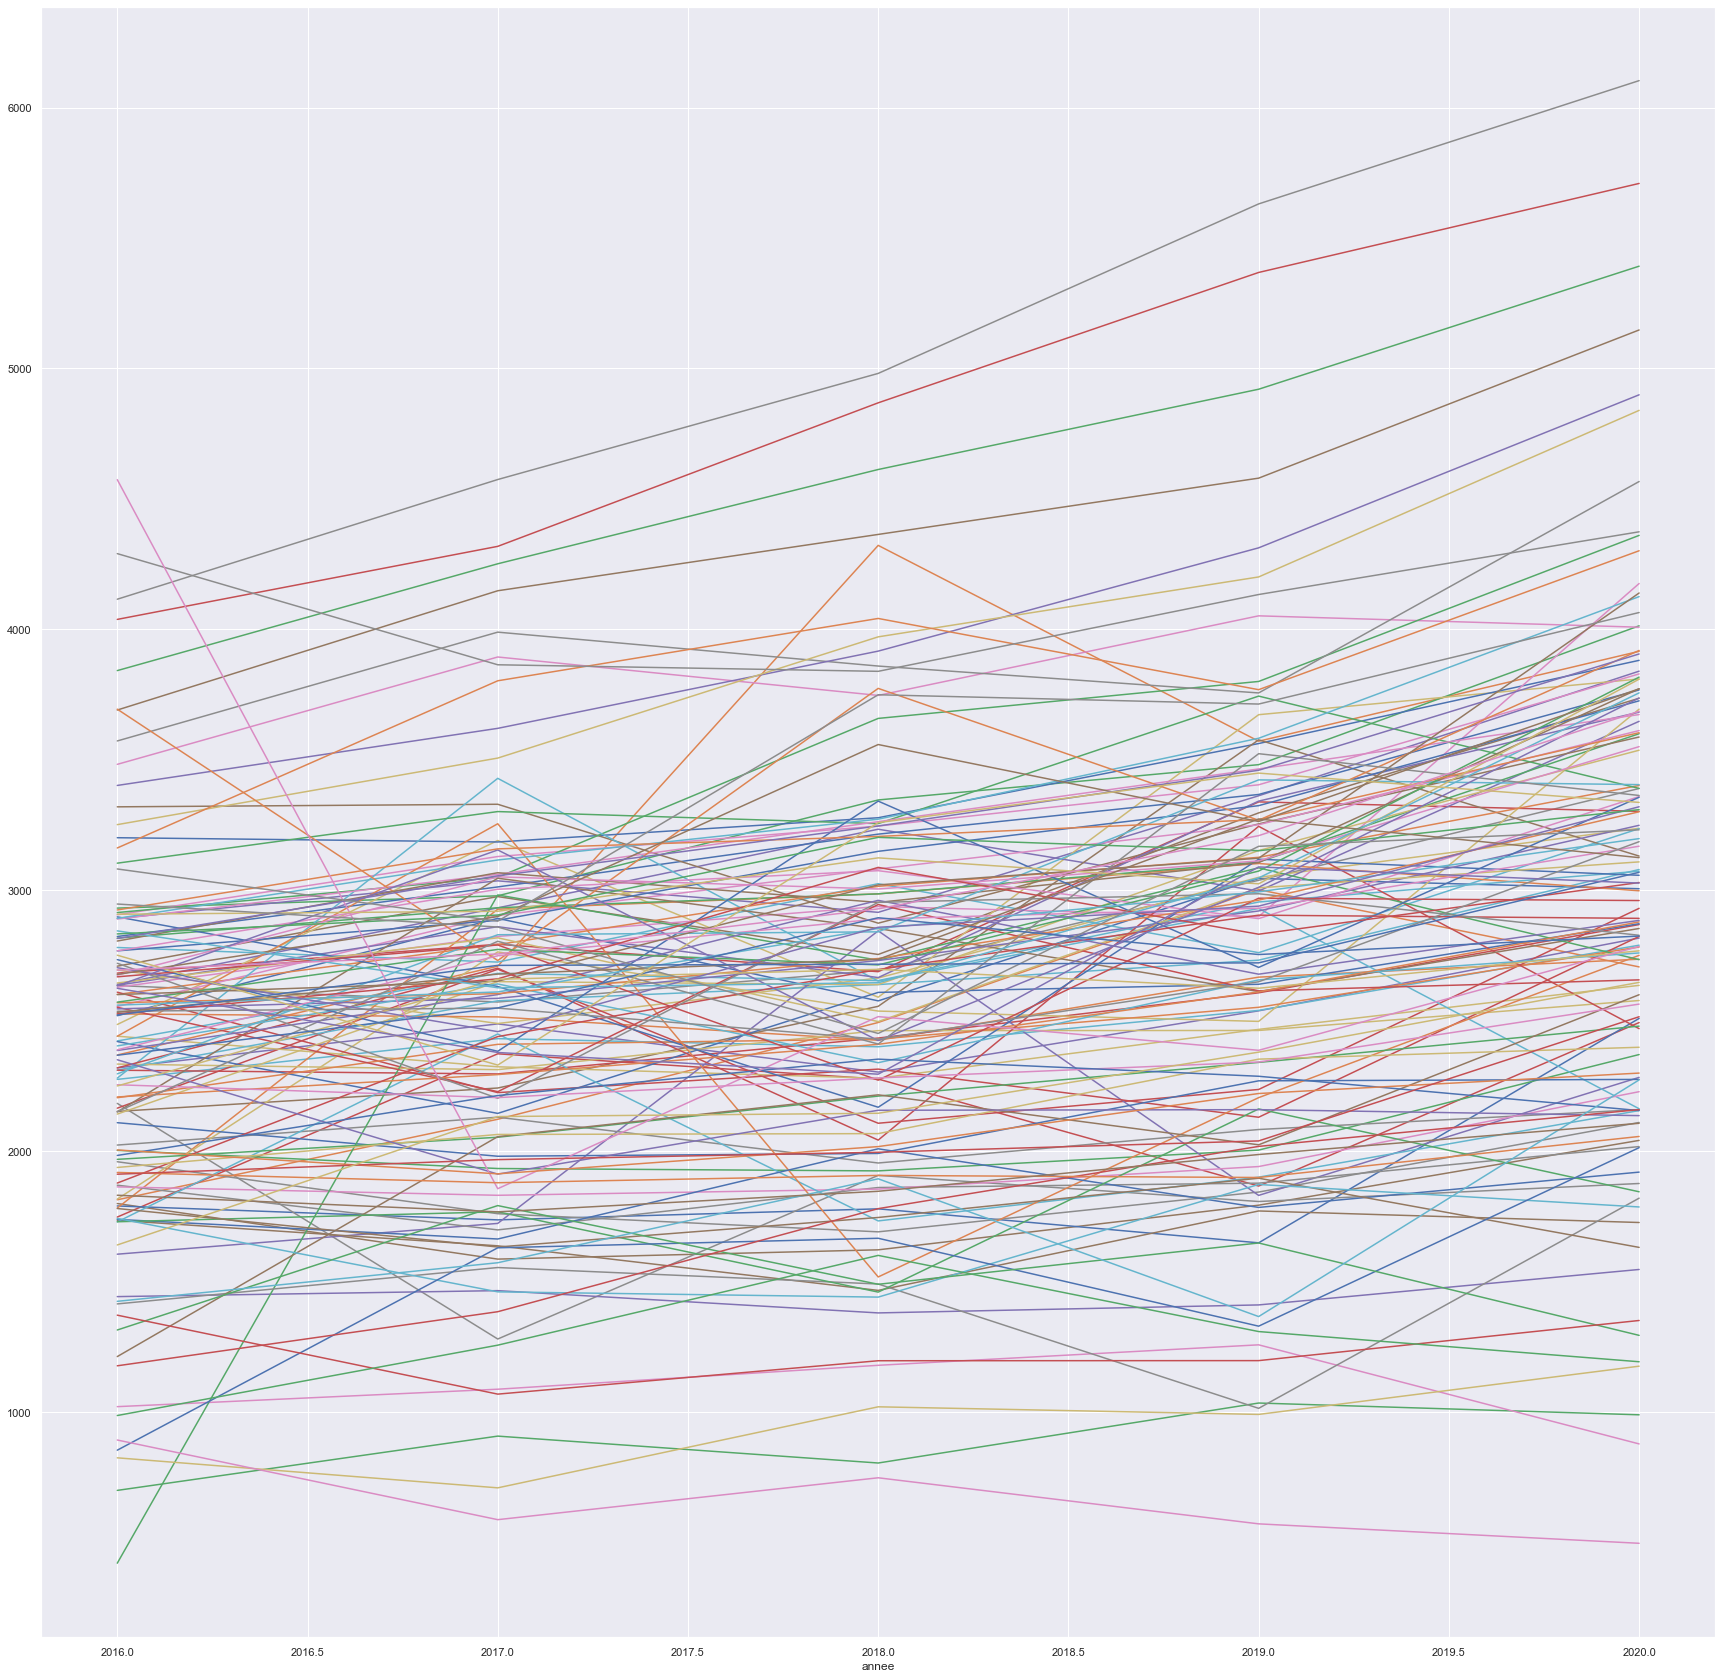

In [113]:
for commune in tmp.index:
    sns.lineplot(x=tmp.loc[commune].index,y=tmp.loc[commune].values,data=tmp.loc[commune])